# Mall Customer Segmentation

## **Content**
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

## **Problem Statement**
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
# imports
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("../mall_customer_segmentation/assets/Mall_Customers.csv")

## Reading Data

Before we jump into creating customer segmentation, it would be great if we do some overview from the dataset.

In [3]:
df.head(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

### Dataset Explanation:

- Customer ID: Unique ID assigned to the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Annual Income: Annual Income of the customer
- Spending Score: Score assigned by the mall based on customer behavior and spending nature

In [4]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

CustomerID  Gender  Age  Income  Score
0           1    Male   19      15     39
1           2    Male   21      15     81
2           3  Female   20      16      6
3           4  Female   23      16     77
4           5  Female   31      17     40

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [6]:
df.describe()

CustomerID         Age      Income       Score
count  200.000000  200.000000  200.000000  200.000000
mean   100.500000   38.850000   60.560000   50.200000
std     57.879185   13.969007   26.264721   25.823522
min      1.000000   18.000000   15.000000    1.000000
25%     50.750000   28.750000   41.500000   34.750000
50%    100.500000   36.000000   61.500000   50.000000
75%    150.250000   49.000000   78.000000   73.000000
max    200.000000   70.000000  137.000000   99.000000

### Exploratory Data Analysis

Here we are going to do basic statistical technique with our data for better understanding.

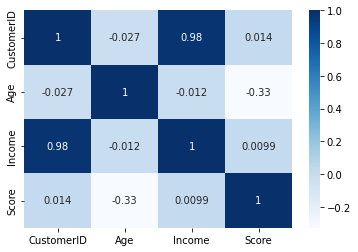

In [7]:
c = df.corr()
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

### Distribution Plot

The distributions generally tend to the normal distribution, with **Spending Score** as the most normal distribution. So it will become our metrics for deep analytics ahead.

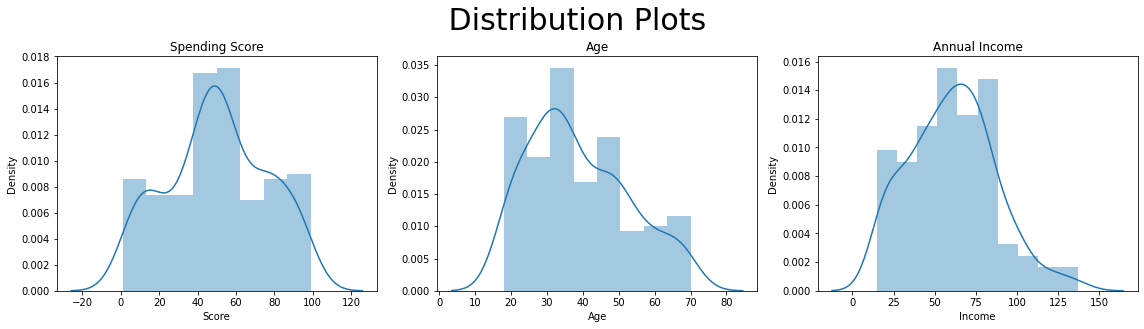

In [8]:
plt.figure(figsize=(16,12))

# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score')
sns.distplot(df['Score'])

# Age
plt.subplot(3,3,2)
plt.title('Age')
sns.distplot(df['Age'])

# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income')
sns.distplot(df['Income'])


plt.suptitle(' Distribution Plots',size = 30)
plt.tight_layout()

### Count Plot

Count plot by gender.

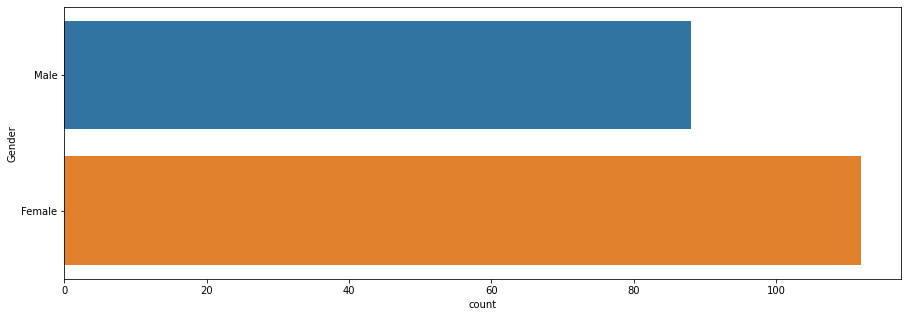

In [9]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### Box Plot by Gender

- Age Box Plots: Nothing significant difference, just Male customers older than Female. But still dominant by adult customers by the mean (Around age 35 - 40). 
- Income Box Plots: Highlighting on outlier income by Male gender.
- Score: Females tend to have higher spending scores and no doubt that females like to go to shopping malls more than males in our real world trend.

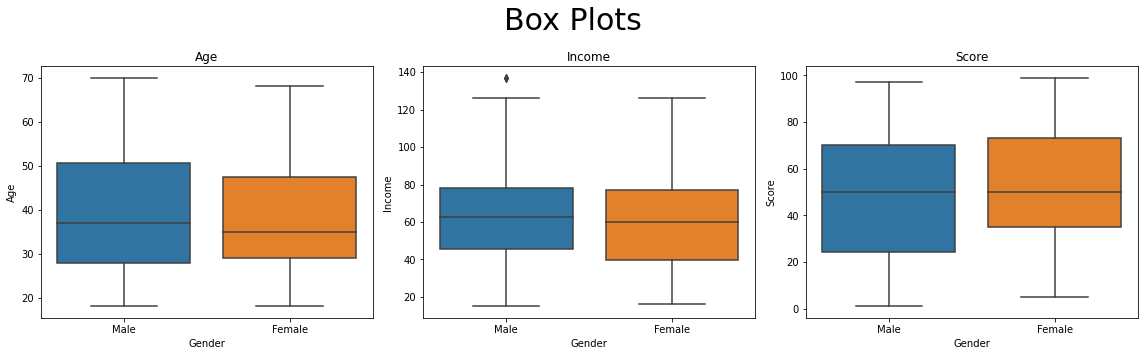

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(x=df.Gender, y=df.Age)
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(x=df.Gender, y=df.Income)
plt.title('Income')

plt.subplot(1,3,3)
sns.boxplot(x=df.Gender, y=df.Score)
plt.title('Score')

plt.suptitle('Box Plots',size = 30)

plt.tight_layout()

### Scatter Plot of Age, Income, and Score

Analyze Age, Income, and Score relation to identify the behaviour between certain variables by scatter plot

Text(0.5, 1.0, 'Age vs Income')

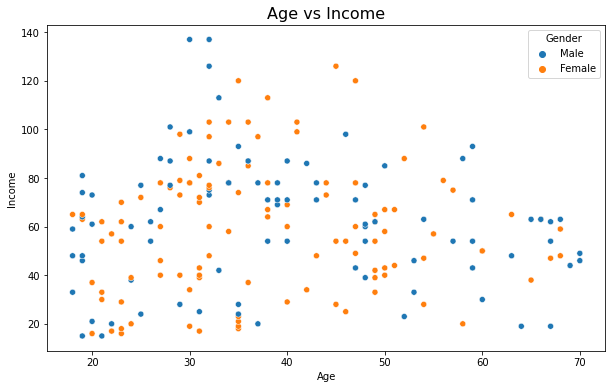

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.Age, y=df.Income, hue=df.Gender)
plt.title('Age vs Income', size = 16)

Text(0.5, 1.0, 'Age vs Score')

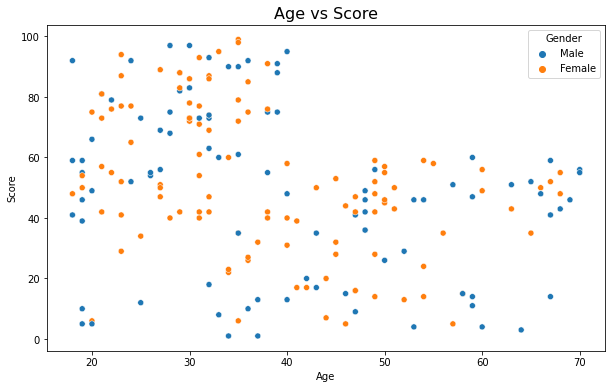

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.Age, y=df.Score, hue=df.Gender)
plt.title('Age vs Score', size = 16)

Under age 40 are dominant in spending scores which make sense relation between these two variables.

Text(0.5, 1.0, 'Income vs Score')

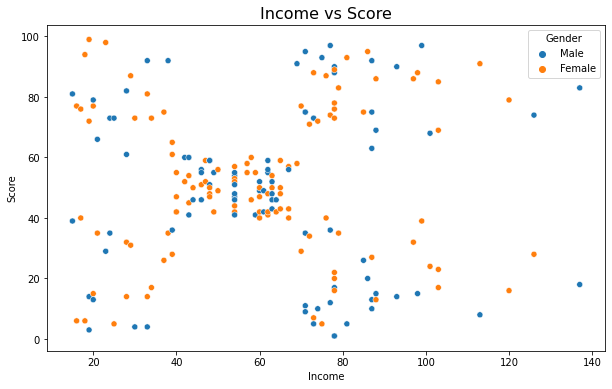

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.Income, y=df.Score, hue=df.Gender)
plt.title('Income vs Score', size = 16)

We can see there are several groups based on behaviour between Income and Score.

### Bar Plot of Income & Score by Age

From this barplot, we can take away an insight of which Age could tell the significant trend in some moments. For adult customers around age 30 - 50 and spending behaviour of buying power is age between 20 - 40. It would become our target audience in terms of increasing the number of revenue or transactions.

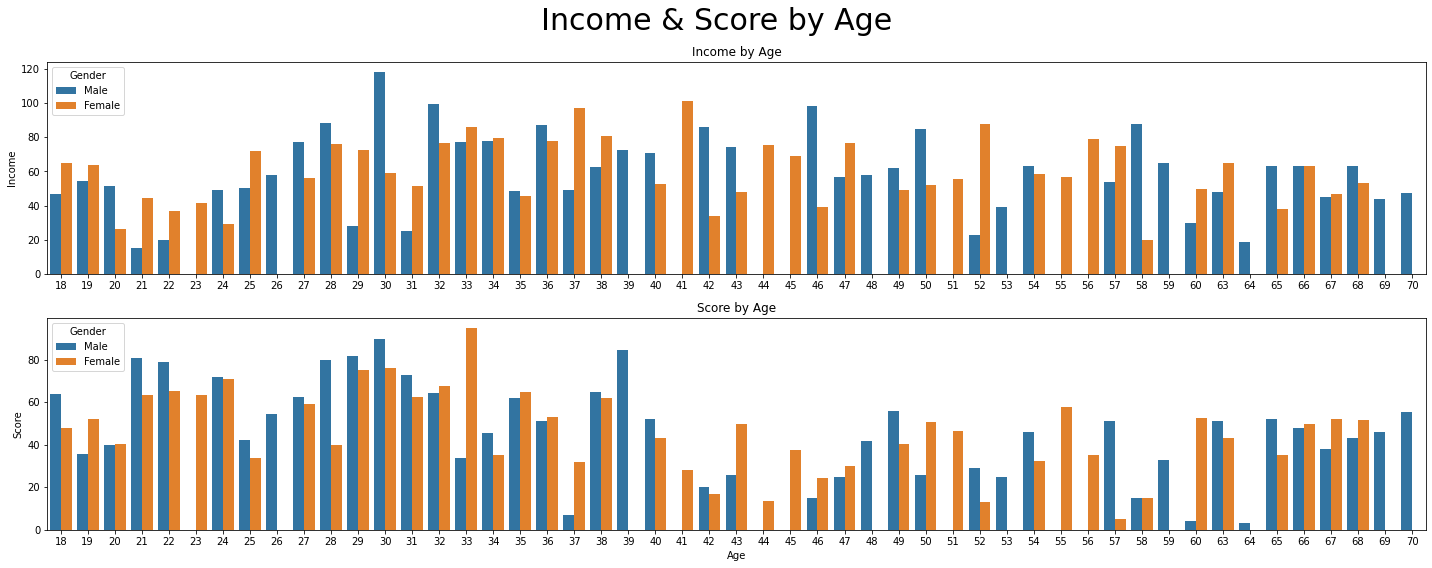

In [14]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
sns.barplot(x=df.Age, y=df.Income, hue=df.Gender, ci=0)
plt.title('Income by Age')
plt.xlabel('')

plt.subplot(2,1,2)
sns.barplot(x=df.Age, y=df.Score, hue=df.Gender, ci=0)
plt.title('Score by Age')

plt.suptitle('Income & Score by Age',size = 30)

plt.tight_layout()

# **Clustering using K-Means**

Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters.

K-Means is an unsupervised machine learning algorithm that groups data into k number of clusters. The number of clusters is user-defined and the algorithm will try to group the data even if this number is not optimal for the specific case.

We are going to use K-Means as our clustering method to identify several groups of mall customers to identify the plan of marketing strategy accordingly.

In [15]:
df_backup = df

In [16]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#df['Gender'] = le.fit_transform(df.iloc[:,1])

### Dropping Unnecessary

We are going to drop the Gender column since it has no direct relation to segmenting customers.

We are also setting Customer ID as our index so it will not affect our Clustering analysis result.


In [17]:
df = df.drop(['Gender'], axis=1) 

df.set_index('CustomerID', inplace=True)

### The Elbow Method 

The Elbow method is a very popular technique for K-Means clustering. In the Elbow Method, we are varying the number of clusters ( K ) from the range of clusters K. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters. Here below the formula.

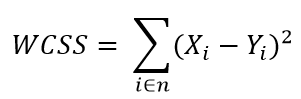

where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

Source: 

- https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3
- https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/#:~:text=WCSS%20is%20the%20sum%20of,is%20largest%20when%20K%20%3D%201.


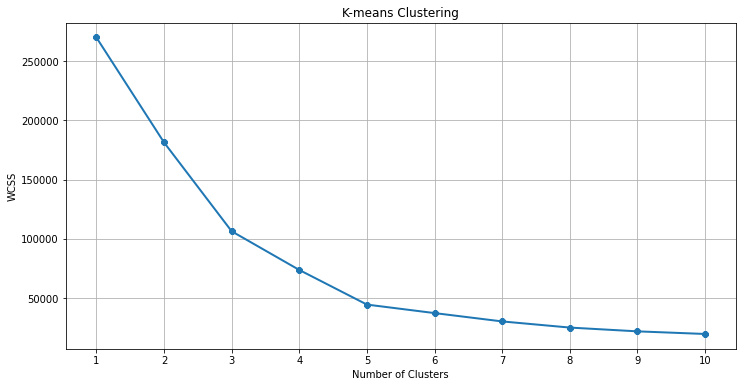

In [18]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, marker ="8")
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title('K-means Clustering')
plt.show()

##### Here are the several steps of The Elbow Method:

1. Calculate K-Means clustering for each values of K by varying K from 1 to 10 clusters.

2. For each K, calculate the total of Within-Cluster Sum of Square (WCSS).

3. Plot the curve of WCSS vs the number of clusters K.

4. Highlighting the knee in the plot and considered it as an indicator of the appropriate number of clusters

We are going to use K Value of 5 as our optimal K Value number for clustering.

### Standard Scaler

We are using StandardScaler to standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.

StandardScaler makes the mean of the distribution approximately 0.

Source: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=StandardScaler%20is%20the%20industry's%20go,of%20scale%20I%20introduced%20earlier.

In [19]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [20]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
kmeans.fit(segmentation_std)

KMeans(n_clusters=5)

In [21]:
#the prediction of which cluster a data belongs to can be extracted from labels_
kmeans.labels_

array([0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0,
       3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 4, 0, 0, 0, 1, 1, 1, 1, 0, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

### Result



In [22]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment'] = kmeans.labels_

In [23]:
df_segm_kmeans.head()

Age  Income  Score  Segment
CustomerID                             
1            19      15     39        0
2            21      15     81        0
3            20      16      6        3
4            23      16     77        0
5            31      17     40        0

In [24]:
##calculate the mean value of each features by cluster
df_segm_analysis = df_segm_kmeans.groupby(['Segment']).mean()
df_segm_analysis

Age     Income      Score
Segment                                 
0        25.185185  41.092593  62.240741
1        55.638298  54.382979  48.851064
2        32.875000  86.100000  81.525000
3        46.250000  26.750000  18.350000
4        39.871795  86.102564  19.358974

### Identify the clustering characteristics

- Spender Customer: Small income but a Spender
- Neutral Customer: Mid income and mid spender
- Loyal Customer: High income and a spender
- Low Target Customer: Small income and not a spender
- Approachable Customer: Big income but not a spender





In [25]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment'].map({0:'Spender Customer',
                1:'Neutral Customer',2:'Loyal Customer',
                3:'Low Target Customer',
                4: 'Approachable Customer'})


In [26]:
df_segm_kmeans

Age  Income  Score  Segment                 Labels
CustomerID                                                    
1            19      15     39        0       Spender Customer
2            21      15     81        0       Spender Customer
3            20      16      6        3    Low Target Customer
4            23      16     77        0       Spender Customer
5            31      17     40        0       Spender Customer
...         ...     ...    ...      ...                    ...
196          35     120     79        2         Loyal Customer
197          45     126     28        4  Approachable Customer
198          32     126     74        2         Loyal Customer
199          32     137     18        4  Approachable Customer
200          30     137     83        2         Loyal Customer

[200 rows x 5 columns]

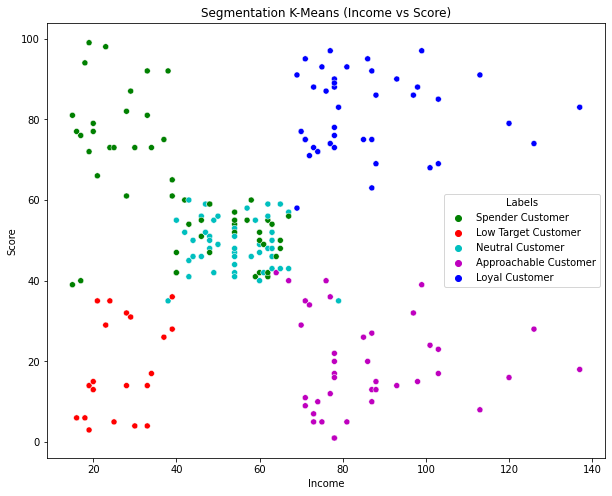

In [27]:
x_axis = df_segm_kmeans['Income']
y_axis = df_segm_kmeans['Score']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette= ['g','r','c','m', 'b'])
plt.title('Segmentation K-Means (Income vs Score)')
plt.show()

### Combine the base data with new labels

In [28]:
left = df_backup[['CustomerID', 'Gender','Age', 'Income', 'Score']]

In [29]:
left.set_index('CustomerID', inplace=True)

In [30]:
left.head(5)

Gender  Age  Income  Score
CustomerID                            
1             Male   19      15     39
2             Male   21      15     81
3           Female   20      16      6
4           Female   23      16     77
5           Female   31      17     40

In [31]:
df_segm_kmeans

Age  Income  Score  Segment                 Labels
CustomerID                                                    
1            19      15     39        0       Spender Customer
2            21      15     81        0       Spender Customer
3            20      16      6        3    Low Target Customer
4            23      16     77        0       Spender Customer
5            31      17     40        0       Spender Customer
...         ...     ...    ...      ...                    ...
196          35     120     79        2         Loyal Customer
197          45     126     28        4  Approachable Customer
198          32     126     74        2         Loyal Customer
199          32     137     18        4  Approachable Customer
200          30     137     83        2         Loyal Customer

[200 rows x 5 columns]

In [32]:
right = df_segm_kmeans[['Segment', 'Labels']]

In [33]:
result = pd.merge(left , right, on=["CustomerID"])



In [34]:
result.head(5)

Gender  Age  Income  Score  Segment               Labels
CustomerID                                                          
1             Male   19      15     39        0     Spender Customer
2             Male   21      15     81        0     Spender Customer
3           Female   20      16      6        3  Low Target Customer
4           Female   23      16     77        0     Spender Customer
5           Female   31      17     40        0     Spender Customer

### Conclusions and Recommendation

From the result above, Our K Means has described some of groups data points into distinct non-overlapping subgroups which is able to help us to get a better understanding and identify the best practice of strategy and treat certain subgroups accordingly.

In my opinion:

- For Approachable Customers, since they have a significant number of Income but haven't tried to spend much yet and creating a membership program might be a suitable strategy for this segment.

- For Spender Customers, we can approach them by creating an interest of buying power from discounts promotion in particular products that might suit their persona of needs behaviour. (We need another purchasing data for deep analytics to identify the personalization of this segment)

- High Target Customer & Neutral Customer might become our main target about how to make them loyal visiting our mall and become our consistent customers.

- I recommend making less effort for Low Target Customers (Low Priority) since they do not have much in income and spending score.